## Name: Crystal Lau
## Date: 06/18/2018
## Challenge: Preparing a dataset for modeling

Assignment:
- select an outcome variable
- pick 4 or 5 other variables (one to two categorical, three to four continuous)
- explore variables using the univariate and bivariate methods
- create ten new features and explain reasoning behind each one
- use filtering methods to select the five best features and justify choices

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', thousands=',')

In [24]:
# preview of data
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


### Data Exploration

In [25]:
# columns and data types
df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [26]:
# renaming columns into workable titles without all the newline nonsense
df.columns = ['City', 'Population', 'Violent_Crime', 'Murder_Nonnegligent_Manslaughter',
              'Rape_1', 'Rape_2', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary',
              'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson']

In [27]:
# stripping whitespace
df.columns = df.columns.str.strip()

In [28]:
(df.isnull().sum()/df.shape[0])*100

City                                  0.000000
Population                            0.000000
Violent_Crime                         0.000000
Murder_Nonnegligent_Manslaughter      0.000000
Rape_1                              100.000000
Rape_2                                0.000000
Robbery                               0.000000
Aggravated_Assault                    0.000000
Property_Crime                        0.000000
Burglary                              0.000000
Larceny_Theft                         0.000000
Motor_Vehicle_Theft                   0.000000
Arson                                46.264368
dtype: float64

In [29]:
# dropping Rape_1 column because all NaN values and no data available for new definition
df.drop(['Rape_1'], axis=1, inplace=True)

In [30]:
df.fillna(0, inplace=True)

### Selecting variables of interest

Outcome Variable:
- Murder

Categorical Variable:
- City

Continuous Variables:
- Population
- Violent_Crime
- Robbery
- Propety_Crime
- Larceny_Theft

In [31]:
# looking at crime rates to observe variables independent of population
df['Rate_Violent_Crime'] = df['Violent_Crime']/df['Population']
df['Rate_Murder'] = df['Murder_Nonnegligent_Manslaughter']/df['Population']
df['Rate_Rape_2'] = df['Rape_2']/df['Population']
df['Rate_Robbery'] = df['Robbery']/df['Population']
df['Rate_Aggravated_Assault'] = df['Aggravated_Assault']/df['Population']
df['Rate_Property_Crime'] = df['Property_Crime']/df['Population']
df['Rate_Burglary'] = df['Burglary']/df['Population']
df['Rate_Larceny_Theft'] = df['Larceny_Theft']/df['Population']
df['Rate_Motor_Vehicle_Theft'] = df['Motor_Vehicle_Theft']/df['Population']
df['Arson'] = df['Arson']/df['Population']

In [32]:
rate_df = df[['City', 'Rate_Violent_Crime', 'Rate_Murder', 'Rate_Rape_2', 'Rate_Robbery',
             'Rate_Aggravated_Assault', 'Rate_Property_Crime', 'Rate_Burglary',
             'Rate_Larceny_Theft', 'Rate_Motor_Vehicle_Theft', 'Arson']]

In [33]:
rate_df.head()

,City,Rate_Violent_Crime,Rate_Murder,Rate_Rape_2,Rate_Robbery,Rate_Aggravated_Assault,Rate_Property_Crime,Rate_Burglary,Rate_Larceny_Theft,Rate_Motor_Vehicle_Theft,Arson
0,Adams Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.006448,0.001075,0.005373,0.000000,0.0
1,Addison Town and Village,0.001164,0.000000,0.000000,0.000000,0.001164,0.009313,0.001164,0.007761,0.000388,0.0
2,Akron Village,0.001054,0.000000,0.000000,0.000000,0.001054,0.005622,0.000351,0.005271,0.000000,0.0
3,Albany,0.008075,0.000082,0.000306,0.002317,0.005370,0.041753,0.007197,0.033107,0.001450,0.0
4,Albion Village,0.003601,0.000000,0.000470,0.000626,0.002505,0.034909,0.008297,0.025830,0.000783,0.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


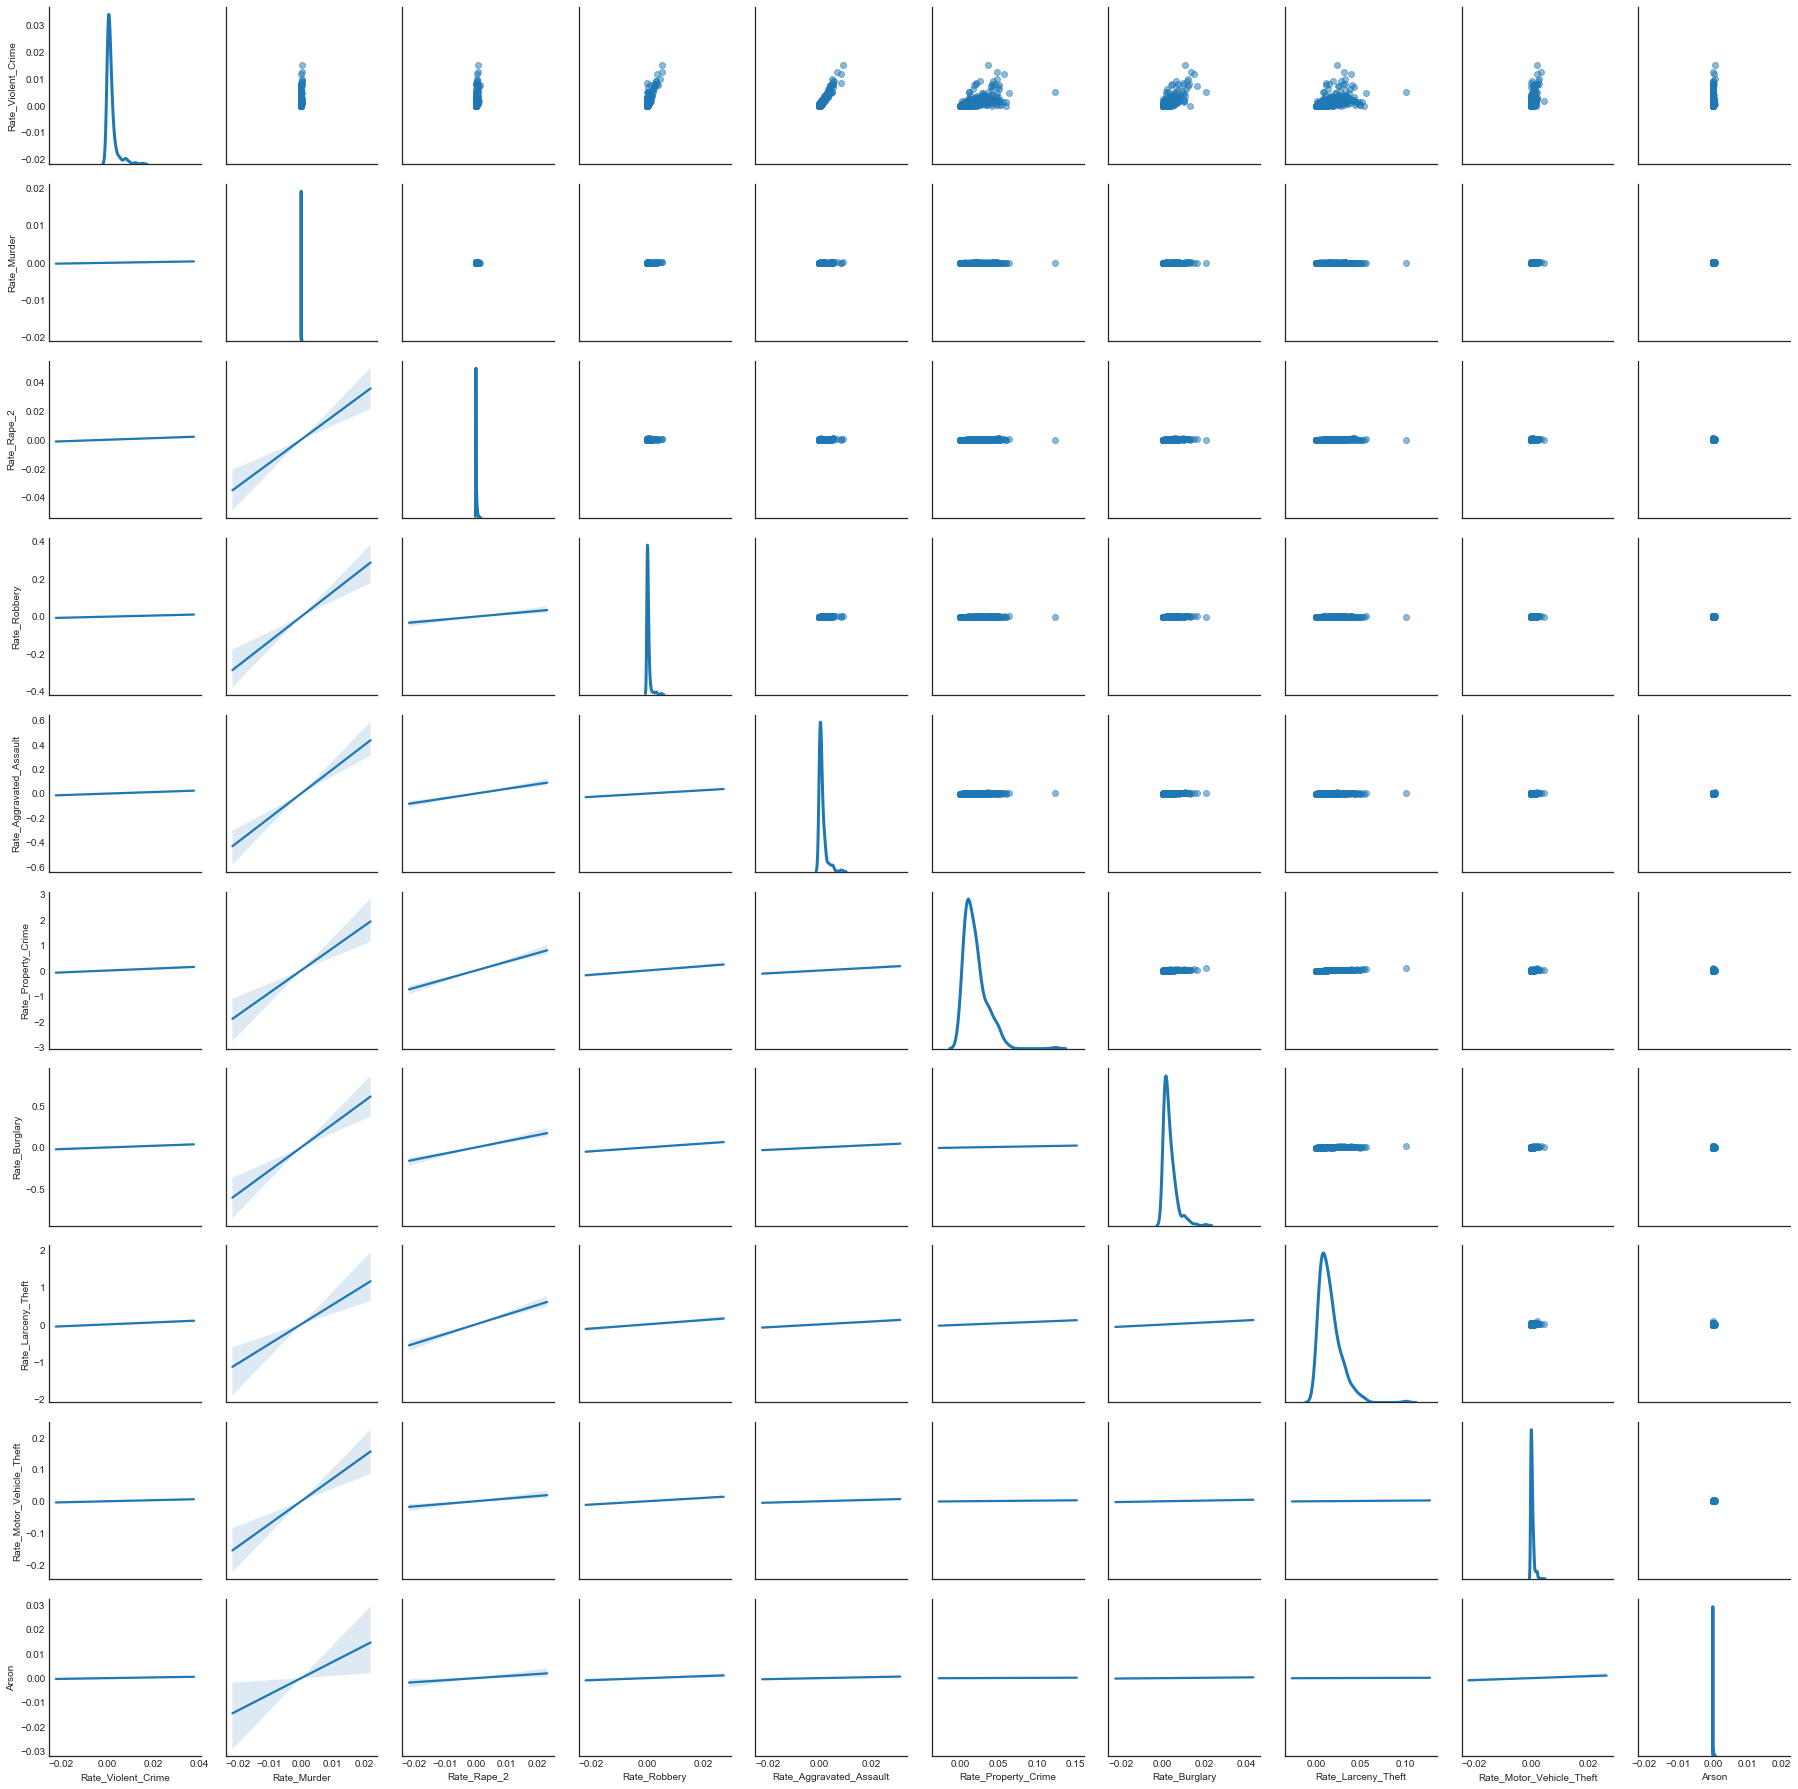

In [34]:
# making scatterplot matrix of variables
sns.set_style('white')

g = sns.PairGrid(rate_df.drop(['City'], axis=1), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [35]:
rate_df.corr()

,Rate_Violent_Crime,Rate_Murder,Rate_Rape_2,Rate_Robbery,Rate_Aggravated_Assault,Rate_Property_Crime,Rate_Burglary,Rate_Larceny_Theft,Rate_Motor_Vehicle_Theft,Arson
Rate_Violent_Crime,1.000000,0.598396,0.593339,0.862699,0.964336,0.531994,0.699370,0.440852,0.588651,0.326996
Rate_Murder,0.598396,1.000000,0.292214,0.639665,0.505044,0.209125,0.331165,0.150449,0.419435,0.246698
Rate_Rape_2,0.593339,0.292214,1.000000,0.404048,0.539163,0.449445,0.485477,0.409399,0.264857,0.171664
Rate_Robbery,0.862699,0.639665,0.404048,1.000000,0.710264,0.419695,0.574677,0.334094,0.630768,0.314235
Rate_Aggravated_Assault,0.964336,0.505044,0.539163,0.710264,1.000000,0.517531,0.681732,0.431420,0.513545,0.300380
Rate_Property_Crime,0.531994,0.209125,0.449445,0.419695,0.517531,1.000000,0.787320,0.985987,0.508681,0.191809
Rate_Burglary,0.699370,0.331165,0.485477,0.574677,0.681732,0.787320,1.000000,0.676478,0.553136,0.240989
Rate_Larceny_Theft,0.440852,0.150449,0.409399,0.334094,0.431420,0.985987,0.676478,1.000000,0.428265,0.159649
Rate_Motor_Vehicle_Theft,0.588651,0.419435,0.264857,0.630768,0.513545,0.508681,0.553136,0.428265,1.000000,0.253423
Arson,0.326996,0.246698,0.171664,0.314235,0.300380,0.191809,0.240989,0.159649,0.253423,1.000000


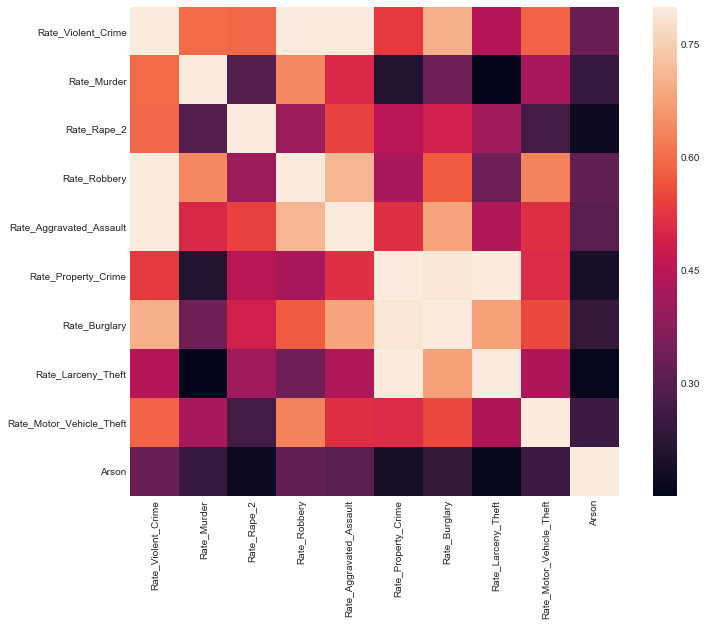

In [36]:
# heat map of correlation values
corrmat = rate_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Feature Engineering and PCA

##### Feature Creation

Reasoning: Seeing if the rate of murder correlates closely with the rates of other crimes. Attempting to see if certain types of crimes present in a city can be used to predict murder rate.

1. Murder-Violent Crime
2. Murder-Rape_2
3. Murder-Robbery
4. Murder-Aggravated Assault
5. Murder-Property Crime
6. Murder-Burglary
7. Murder-Larceny Theft
8. Murder-Arson
9. Murder-Motor Vehicle Theft

Reasoning: From the heat map, these are the two crimes: Violent Crime/Robbery seem to correlate most to murder.

10. Murder-Violent Crime-Robbery

##### PCA

In [37]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(rate_df.drop(['City'], axis=1))
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.69099278e-01 2.34973128e-02 5.93199243e-03 9.17463024e-04
 4.50349972e-04]


There's a component that explains the variance of 96% of the values, with another explaining 2%. With these two components, we can have 98% of the variance in the rate_df explained.

### Filtering

Features to keep:
1. Murder-Violent Crime
2. Murder-Robbery
3. Murder-Violent Crime-Robbery
4. Component 1 of PCA
5. Component 2 of PCA

First 3 are features that seem to correlate strongly with Murder Rate. The last two explain 98% of variance in dataset (not directly related to murder but wanted to see if we're measuring something unintentionally that is skewing the data.